# 0. 기본 정보
* 코드 작성자: 여서연
* 코드 작성일: 2024-06-02

# 1. 기초 설정

## 사용 라이브러리

In [1]:
import requests
import json
import pandas as pd

from dotenv import load_dotenv
import os

import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

import warnings
warnings.filterwarnings('ignore')


## 기타 설정

In [2]:
# 데이터 프레임 열 전부 표시
pd.set_option('display.max_columns', None)

In [3]:
load_dotenv()
myKEY = os.environ.get('PUBLIC_DATA_API_KEY')

# 2. API 데이터 수집

## A. [환경부 국립환경과학원_골프장 농약사용량 DB](https://www.data.go.kr/data/15000937/openapi.do)

In [4]:
new_columns = {
    'SPOT_STD_CODE': '지점표준코드',
    'SIDO': '시도',
    'GOLFCLUB_NAME': '골프장명',
    'GOLF_TYPE_NAME': '골프장 형태',
    'ADDRESS': '소재지',
    'HOLE_CNT': '홀수',
    'REG_YEAR': '개장년도',
    'YEAR': '입력년도',
    'PES_GROUND': '농약사용면적(m2)',
    'TOTAL_GROUND': '면적총계(m2)',
    'NONE_GROUND': '농약미사용면적(m2)',
    'SPRAY_SUPPLY': '총사용량_실물량(kg)',
    'REAL_SUPPLY': '총사용량_성분량(kg)',
    'THA_SPRAY': '전체면적대비_ha_실물량(kg)',
    'THA_REAL': '전체면적대비_ha_성분량(kg)',
    'HA_SPRAY': '농약사용_ha_실물량(kg)',
    'HA_REAL': '농약사용_ha_성분량(kg)'
}

In [5]:
# 시군구 추출 함수 - 주소를 공백을 기준으로 나눠 시군구 추출
def ExtractSigungoo(address):
    parts = address.split()
    if len(parts) > 1: #주소가 둘 이상으로 쪼개질 경우
        return parts[1]
    return None

In [6]:
def GetGolf(key, sido, year):
    url = 'http://apis.data.go.kr/1480523/SgisGp/getSgisGpList1' #API 호출 URL
    params = {'serviceKey' : key, 'pageNo' : '1', 'numOfRows' : '1000', 'resultType' : 'JSON', 'search_year': year} #parameter 지정
    response = requests.get(url, params=params) #API 호출 응답 결과 저장
    result = json.loads(response.content) #응답을 json 형식으로 변환
    golf = pd.DataFrame(result['getSgisGpList']['item']) #item 항목을 data frame으로 저장 - 전국 데이터

    # column 이름 변경
    golf.rename(columns=new_columns, inplace=True)

    # 시군구 컬럼 추가
    golf['시군구'] = golf['소재지'].apply(ExtractSigungoo)

    # 시도 컬럼 바로 옆에 시군구 컬럼 배치
    columns = list(golf.columns)
    sido_index = columns.index('시도') #'시도' column의 index 추출
    columns.insert(sido_index + 1, columns.pop(columns.index('시군구'))) #바로 옆에 추가하고 기존 column을 삭제
    golf = golf[columns]

    return golf[golf['시도']==sido].reset_index(drop=True)

In [7]:
golf_2020 = GetGolf(myKEY, '강원도', '2020')
golf_2019 = GetGolf(myKEY, '강원도', '2019')
golf_2018 = GetGolf(myKEY, '강원도', '2018')

In [8]:
golf_2020.sample()

,지점표준코드,입력년도,골프장명,소재지,홀수,시도,시군구,개장년도,골프장 형태,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg)
3,42130G040200004,2020,인터불고호텔원주G.C.,강원도 원주시 반곡동 1809-1,9,강원도,원주시,2010,대중제,165318,116705,48613,368.423,83.396624,7.145934107364723,31.56874169915599,5.044618492844094,22.285716013985166


In [9]:
golf_2020.shape

(61, 18)

In [10]:
golf_2019.sample()

,지점표준코드,입력년도,골프장명,소재지,홀수,시도,시군구,개장년도,골프장 형태,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg)
63,42730G040100004,2019,동원썬밸리CC,강원도 횡성군 서원면 석화리 646,18,강원도,횡성군,2015,회원제,1097999,572330,525669,1233.05,338.26,5.91,21.54,3.08,11.23


In [11]:
golf_2019.shape

(64, 18)

In [12]:
golf_2018.sample()

,지점표준코드,입력년도,골프장명,소재지,홀수,시도,시군구,개장년도,골프장 형태,면적총계(m2),농약사용면적(m2),농약미사용면적(m2),총사용량_실물량(kg),총사용량_성분량(kg),농약사용_ha_성분량(kg),농약사용_ha_실물량(kg),전체면적대비_ha_성분량(kg),전체면적대비_ha_실물량(kg)
30,42760G040200001,2018,알펜시아700골프클럽,강원도 평창군 대관령면 수하리 산240-1,18,강원도,평창군,2009,대중제,1270178.0,594118.0,676060.0,1960.2799,479.2769,8.06703213839675,32.9947905971541,3.773305001346268,15.433111737095116


In [13]:
golf_2018.shape

(63, 18)

In [14]:
print('2020:', np.sort(golf_2020['시군구'].unique()))
print()
print('2019:', np.sort(golf_2019['시군구'].unique()))
print()
print('2018:', np.sort(golf_2018['시군구'].unique()))

2020: ['강릉시' '고성군' '동해시' '삼척시' '속초시' '양양군' '영월군' '원주시' '정선군' '철원군' '춘천시' '태백시'
 '평창군' '홍천군' '횡성군']

2019: ['강릉시' '고성군' '동해시' '삼척시' '속초시' '양양군' '영월군' '원주시' '정선군' '철원군' '춘천시' '태백시'
 '평창군' '홍천군' '횡성군']

2018: ['강릉시' '고성군' '동해시' '삼척시' '속초시' '양양군' '영월군' '원주시' '정선군' '철원군' '춘천시' '태백시'
 '평창군' '홍천군' '횡성군']


In [15]:
golf_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지점표준코드             61 non-null     object
 1   입력년도               61 non-null     object
 2   골프장명               61 non-null     object
 3   소재지                61 non-null     object
 4   홀수                 61 non-null     object
 5   시도                 61 non-null     object
 6   시군구                61 non-null     object
 7   개장년도               61 non-null     object
 8   골프장 형태             61 non-null     object
 9   면적총계(m2)           61 non-null     object
 10  농약사용면적(m2)         61 non-null     object
 11  농약미사용면적(m2)        61 non-null     object
 12  총사용량_실물량(kg)       61 non-null     object
 13  총사용량_성분량(kg)       61 non-null     object
 14  농약사용_ha_성분량(kg)    61 non-null     object
 15  농약사용_ha_실물량(kg)    61 non-null     object
 16  전체면적대비_ha_성분량(kg)  61 non-null     object
 17 

In [16]:
# 데이터 저장
golf_2020.to_csv('../data/golf_Gangwon_2020.csv', index=False, encoding='utf-8-sig')

In [17]:
golf_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지점표준코드             64 non-null     object
 1   입력년도               64 non-null     object
 2   골프장명               64 non-null     object
 3   소재지                64 non-null     object
 4   홀수                 64 non-null     object
 5   시도                 64 non-null     object
 6   시군구                64 non-null     object
 7   개장년도               64 non-null     object
 8   골프장 형태             64 non-null     object
 9   면적총계(m2)           64 non-null     object
 10  농약사용면적(m2)         64 non-null     object
 11  농약미사용면적(m2)        64 non-null     object
 12  총사용량_실물량(kg)       64 non-null     object
 13  총사용량_성분량(kg)       64 non-null     object
 14  농약사용_ha_성분량(kg)    64 non-null     object
 15  농약사용_ha_실물량(kg)    64 non-null     object
 16  전체면적대비_ha_성분량(kg)  64 non-null     object
 17 

In [18]:
# 데이터 저장
golf_2019.to_csv('../data/golf_Gangwon_2019.csv', index=False, encoding='utf-8-sig')

In [19]:
golf_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   지점표준코드             63 non-null     object
 1   입력년도               63 non-null     object
 2   골프장명               63 non-null     object
 3   소재지                63 non-null     object
 4   홀수                 63 non-null     object
 5   시도                 63 non-null     object
 6   시군구                63 non-null     object
 7   개장년도               63 non-null     object
 8   골프장 형태             63 non-null     object
 9   면적총계(m2)           63 non-null     object
 10  농약사용면적(m2)         63 non-null     object
 11  농약미사용면적(m2)        63 non-null     object
 12  총사용량_실물량(kg)       63 non-null     object
 13  총사용량_성분량(kg)       63 non-null     object
 14  농약사용_ha_성분량(kg)    63 non-null     object
 15  농약사용_ha_실물량(kg)    63 non-null     object
 16  전체면적대비_ha_성분량(kg)  63 non-null     object
 17 

In [20]:
# 데이터 저장
golf_2018.to_csv('../data/golf_Gangwon_2018.csv', index=False, encoding='utf-8-sig')

## B. [환경부 국립환경과학원_수질 DB](https://www.data.go.kr/data/15081073/openapi.do)

### 시도별 수질측정망 지점

In [21]:
code_df = pd.read_excel('../API documents/국립환경과학원_openAPI_활용가이드_수질DB/물환경 수질측정망 운영결과 DB_물환경_코드_코드명.xlsx', header=1)
code_df

,구분,지점코드,지점명,조사기관,주소,대권역,중권역
0,하천수,1001A05,송천1,원주지방환경청,강원도 평창군 대관령면 용산리(용산교),한강,남한강상류
1,하천수,1001A10,송천4,원주지방환경청,강원도 정선군 여량면 유천리(송천교),한강,남한강상류
2,하천수,1001A15,골지천2,한국수자원공사,강원도 태백시 하사미동 290-1(하사미교),한강,남한강상류
3,하천수,1001A20,번천,한국수자원공사,강원도 삼척시 하장면 숙암리 90-4,한강,남한강상류
4,하천수,1001A25,골지천4,원주지방환경청,강원도 정선군 여량면 여량리(여량1교),한강,남한강상류
...,...,...,...,...,...,...,...
2213,하천수,5101A05,탐진강1(탐진A1),영산강물환경연구소,전라남도 장흥군 유치면 운월리(운월교),영산강ㆍ섬진강,탐진강
2214,하천수,5101A15,유치천1(탐진A2),영산강물환경연구소,전라남도 영암군 금정면 연소리(한대교),영산강ㆍ섬진강,탐진강
2215,하천수,5101A25,옴천천2(탐진A3),영산강물환경연구소,전라남도 강진군 옴천면 봉림리(봉림교),영산강ㆍ섬진강,탐진강
2216,하천수,5101A45,금강천1(탐진B1),영산강물환경연구소,전라남도 강진군 병영면 삭양리(삭양교),영산강ㆍ섬진강,탐진강


In [22]:
# 주소 컬럼의 데이터를 공백을 기준으로 분리하여 시도, 시군구 추출
code_df['시도'] = code_df['주소'].apply(lambda x: x.split()[0])
code_df['시군구'] = code_df['주소'].apply(lambda x: x.split()[1])

print(code_df['시도'].unique())
print()
print(code_df['시군구'].unique())

['강원도' '충청북도' '경기도' '서울특별시' '인천광역시' '충청남도' '인천광역시시' '경상북도' '경북' '대구광역시'
 '대구광역시시' '경상남도' '전라북도' '부산광역시' '울산광역시' '울산광역시시' '부산광역시시' '대전광역시' '대전광역시시'
 '세종특별자치시' '전라남도' '광주' '광주광역시' '제주특별자치도']

['평창군' '정선군' '태백시' '삼척시' '영월군' '횡성군' '원주시' '단양군' '제천시' '충주시' '청주시' '괴산군'
 '보은군' '음성군' '홍천군' '안성시' '이천시' '여주시' '양평군' '용인시' '화천군' '양구군' '춘천시' '인제군'
 '가평군' '남양주시' '광주시' '강동구' '성남시' '강남구' '성동구' '의정부시' '노원구' '성북구' '동대문구' '중구'
 '용산구' '영등포구' '마포구' '군포시' '안양시' '구로구' '동작구' '양천구' '강서구' '고양시' '김포시' '계양구'
 '파주시' '연천군' '철원군' '포천시' '양주시' '동두천시' '하남시' '구리시' '송파구' '천안시' '평택시' '화성시'
 '오산시' '의왕시' '수원시' '아산시' '강화군' '서구' '시흥시' '남동구' '화성군' '안산시' '고성군' '양양군'
 '속초시' '강릉시' '동해시' '봉화군' '안동시' '영양군' '청송군' '예천군' '의성군' '영주시' '문경시' '상주시'
 '군위군' '구미시' '김천시' '칠곡군' '성주군' '달성군' '영천시' '경산시' '동구' '북구' '달서구' '수성구'
 '합천군' '고령군' '창녕군' '달성구' '거창군' '의령군' '함양군' '남원시' '산청군' '진주시' '사천시' '하동군'
 '함안군' '창원시' '밀양시' '김해시' '경주시' '청도군' '양산시' '사상구' '사하구' '포항시' '울주군' '포항'
 '남구' '금정구' '수영구' '기장군' '동래구' '해운대구광역시' '부산광역시진구' '울진군' '영덕군' '남해군' '거제시'
 '창원' 

In [23]:
sido_correction = {
    '서울특별시': '서울특별시',
    '인천광역시': '인천광역시',
    '인천광역시시': '인천광역시',
    '대구광역시': '대구광역시',
    '대구광역시시': '대구광역시',
    '부산광역시': '부산광역시',
    '부산광역시시': '부산광역시',
    '경기도': '경기도',
    '강원도': '강원도',
    '충청북도': '충청북도',
    '충청남도': '충청남도',
    '전라북도': '전라북도',
    '전라남도': '전라남도',
    '제주특별자치도': '제주특별자치도',
    '세종특별자치시': '세종특별자치시',
    '경상북도': '경상북도',
    '경북': '경상북도',
    '경상남도': '경상남도',
    '광주광역시': '광주광역시',
    '광주': '광주광역시',
    '울산광역시': '울산광역시',
    '울산광역시시': '울산광역시',
    '대전광역시': '대전광역시',
    '대전광역시시': '대전광역시'
}

In [24]:
# 오타 수정
code_df['시도'] = code_df['시도'].map(sido_correction)
code_df['시도'].unique()

array(['강원도', '충청북도', '경기도', '서울특별시', '인천광역시', '충청남도', '경상북도', '대구광역시',
       '경상남도', '전라북도', '부산광역시', '울산광역시', '대전광역시', '세종특별자치시', '전라남도',
       '광주광역시', '제주특별자치도'], dtype=object)

In [25]:
np.sort(code_df[code_df['시도']=='강원도']['시군구'].unique())

array(['가평군', '강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군',
       '원주시', '인제군', '정선군', '철원군', '춘천시', '태백시', '파주시', '평창군', '홍천군',
       '화천군', '횡성군'], dtype=object)

In [26]:
# 강원도 지점코드 추출
codes = code_df[code_df['시도']=='강원도']['지점코드'].unique()
codes_list = list(codes)
code_Gangwon = ','.join(codes_list)
code_Gangwon

'1001A05,1001A10,1001A15,1001A20,1001A25,1001A30,1001A35,1001A40,1001A45,1001A50,1001A55,1001A60,1001A65,1001A70,1001A75,1001A80,1001A85,1001B10,1002A10,1002A20,1002A30,1002A40,1002A50,1002A55,1002D10,1002D20,1002D30,1002D40,1002D50,1002D60,1003A05,1003A10,1003A15,1005A55,1005A60,1005D10,1005D20,1006A05,1006A10,1006A15,1006A20,1006A25,1006A30,1006A35,1006A40,1006A45,1006A50,1006A55,1006A60,1006A65,1006A70,1006A80,1006B10,1006B20,1006B30,1006D05,1006D10,1006D15,1006D20,1006D25,1006D30,1006D35,1006D40,1006D45,1006D50,1006D55,1006D60,1006E11,1009A10,1009B10,1009B20,1010A10,1010A30,1010A40,1010A50,1010B10,1010B20,1010B30,1010B40,1010B50,1010B60,1010D10,1010D20,1011A10,1011A20,1011A30,1011D10,1012A20,1012A30,1012A40,1012B10,1012B20,1012B30,1012B35,1012B40,1012D10,1012E11,1013A05,1013A10,1013A20,1013A40,1013A50,1013A60,1013B10,1013B20,1013B30,1013D10,1013D20,1013D30,1014A10,1014A20,1014A30,1014A70,1014D10,1014D20,1014D30,1014D40,1014D50,1014D60,1014D70,1014D80,1014E10,1019D10,1021D10,1022A05

### 물환경 수질측정망 운영결과 월평균 DB

In [27]:
new_cols = {
    'PTNO': '조사지점코드',
    'PTNM': '조사지점명',
    'WMYR': '측정년도',
    'WMOD': '측정월',
    'ITEMTCOLI': '측정값(총대장균군)'
}

In [28]:
def GetWaterQuality(key, codes, year):
    url = 'http://apis.data.go.kr/1480523/WaterQualityService/getWaterMeasuringListMavg' #API 호출 URL
    params ={'serviceKey' : key, 'pageNo' : '1', 'numOfRows' : '5000', 'resultType' : 'JSON', 'ptNoList' : codes, 'wmyrList' : year} #parameter 지정
    response = requests.get(url, params=params) #API 호출 응답 결과 저장
    result = json.loads(response.content) #응답을 json 형식으로 변환
    water_qual = pd.DataFrame(result['getWaterMeasuringListMavg']['item']) #item 항목을 data frame으로 저장

    # 분석 대상 column만 추출
    selected_columns = ['PTNM', 'PTNO', 'WMYR', 'WMOD', 'ITEMTCOLI']
    water_qual = water_qual[selected_columns]

    # 컬럼 이름 변경
    water_qual.rename(columns=new_cols, inplace=True)

    return water_qual

In [29]:
WQ_2020 = GetWaterQuality(myKEY, code_Gangwon, '2020')
WQ_2019 = GetWaterQuality(myKEY, code_Gangwon, '2019')
WQ_2018 = GetWaterQuality(myKEY, code_Gangwon, '2018')

In [30]:
WQ_2020.sample()

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
573,섬강4,1006A60,2020,11,1120.0


In [31]:
WQ_2020.shape

(1423, 5)

In [32]:
WQ_2019.sample()

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
1290,화천,1009A10,2019,01,8.0


In [33]:
WQ_2019.shape

(1460, 5)

In [34]:
WQ_2018.sample()

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
1033,골지천4,1001A25,2018,06,2540.0


In [35]:
WQ_2018.shape

(1610, 5)

#### 결측치 처리

In [36]:
def NullDist(df):
    # 결측치가 있는 행
    na_values = df[df['측정값(총대장균군)'].isna()]
    # 결측치의 측정월 분포 계산
    month_dist = na_values['측정월'].value_counts().sort_index()

    # 측정월을 1월부터 12월까지 정렬
    months = list(range(0, 12))
    month_counts = [month_dist.get(month, 0) for month in months]
    # 바 차트 작성
    plt.bar(months, month_counts, color='skyblue', edgecolor='black')
    plt.xticks(months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.show()

In [37]:
def Interpolate(df, except_codes):
    # 조건을 만족하는 행 필터링
    filtered_data = df[df['조사지점코드'].isin(except_codes)]

    # '조사지점코드'을 기준으로 그룹화하여 '측정값(총대장균군)' 딕셔너리 생성
    coli_dict = {}
    for code, group in filtered_data.groupby('조사지점코드'):
        coli_dict[code] = group['측정값(총대장균군)'].tolist()

    # nan 값의 비율이 50%가 넘는 '조사지점코드'만 except_codes에 남김
    except_codes = [code for code in except_codes if np.mean(pd.Series(coli_dict[code]).isna()) >= 0.5]

    # '조사지점명'을 기준으로 그룹화하여 '측정월' 딕셔너리 생성
    month_dict = {}
    for code, group in df.groupby('조사지점코드'):
        months = group['측정월'].tolist()
        if len(months) < 6: # 측정월이 1년의 절반이 안 되는 경우 배제
            month_dict[code] = group['측정월'].tolist()

    # except_codes에 위 경우에 해당하는 '조사지점코드'추가
    new_keys = list(month_dict.keys())
    except_codes.extend(new_keys)

    # except_codes를 전체 데이터에서 배제
    df = df[~df['조사지점코드'].isin(except_codes)]
    df.isnull().sum()

    # 전체 결측치에 대해 선형 보간
    df.interpolate(method='linear', inplace=True, limit_direction='both')

    return df

2020년

In [38]:
# 결측치 수와 비율 계산
mis_count_2020 = WQ_2020.isnull().sum()
mis_ratio_2020 = round(mis_count_2020 / len(WQ_2020) * 100, 2)

# 결측치 수와 비율 출력
mis_info_2020 = pd.concat([mis_count_2020, mis_ratio_2020], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(mis_info_2020)

            결측치 수  결측치 비율 (%)
조사지점명           0         0.0
조사지점코드          0         0.0
측정년도            0         0.0
측정월             0         0.0
측정값(총대장균군)    175        12.3


In [39]:
# '조사지점코드'을 기준으로 '측정월'을 바르게 정렬
WQ_2020 = WQ_2020.groupby('조사지점코드').apply(lambda x: x.sort_values('측정월', ascending=True)).reset_index(drop=True)
WQ_2020

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
0,송천1,1001A05,2020,01,620.0
1,송천1,1001A05,2020,02,1480.0
2,송천1,1001A05,2020,03,80.0
3,송천1,1001A05,2020,04,120.0
4,송천1,1001A05,2020,05,180.0
...,...,...,...,...,...
1418,황지2,2001A30,2020,08,NaN
1419,황지2,2001A30,2020,09,2400.0
1420,황지2,2001A30,2020,10,2240.0
1421,황지2,2001A30,2020,11,1600.0


In [40]:
WQ_2020.describe()

,측정값(총대장균군)
count,1248.000000
mean,3688.653846
std,12003.875075
min,0.000000
25%,100.000000
50%,585.000000
75%,2515.000000
max,248000.000000


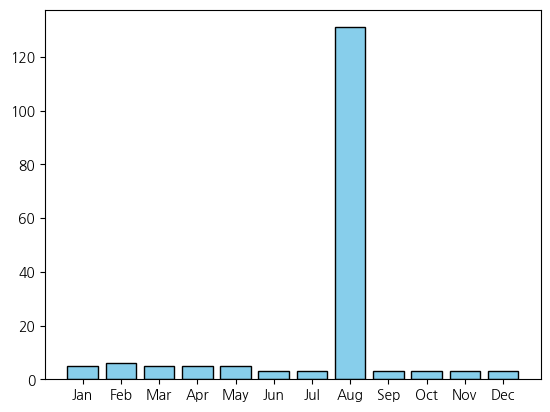

In [41]:
NullDist(WQ_2020)

In [42]:
except_codes_2020 = list(WQ_2020[(WQ_2020['측정값(총대장균군)'].isna()) & (WQ_2020['측정월']!='08')]['조사지점코드'].unique())
print(except_codes_2020)

['1006A63', '1006A75', '1006B10', '1009B10', '1009B20', '1010A35']


In [43]:
WQ_2020 = Interpolate(WQ_2020, except_codes_2020)
WQ_2020.isnull().sum()

조사지점명         0
조사지점코드        0
측정년도          0
측정월           0
측정값(총대장균군)    0
dtype: int64

In [44]:
WQ_2020.describe()

,측정값(총대장균군)
count,1354.000000
mean,4176.319793
std,12518.614762
min,0.000000
25%,117.750000
50%,720.000000
75%,3000.000000
max,248000.000000


2019년

In [45]:
# 결측치 수와 비율 계산
mis_count_2019 = WQ_2019.isnull().sum()
mis_ratio_2019 = round(mis_count_2019 / len(WQ_2019) * 100, 2)

# 결측치 수와 비율 출력
mis_info_2019 = pd.concat([mis_count_2019, mis_ratio_2019], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(mis_info_2019)

            결측치 수  결측치 비율 (%)
조사지점명           0        0.00
조사지점코드          0        0.00
측정년도            0        0.00
측정월             0        0.00
측정값(총대장균군)    119        8.15


In [46]:
# '조사지점코드'을 기준으로 '측정월'을 바르게 정렬
WQ_2019 = WQ_2019.groupby('조사지점코드').apply(lambda x: x.sort_values('측정월', ascending=True)).reset_index(drop=True)
WQ_2019

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
0,송천1,1001A05,2019,02,3780.0
1,송천1,1001A05,2019,03,1040.0
2,송천1,1001A05,2019,04,840.0
3,송천1,1001A05,2019,05,1240.0
4,송천1,1001A05,2019,06,22500.0
...,...,...,...,...,...
1455,황지2,2001A30,2019,08,22000.0
1456,황지2,2001A30,2019,09,12000.0
1457,황지2,2001A30,2019,10,32400.0
1458,황지2,2001A30,2019,11,20200.0


In [47]:
WQ_2019.describe()

,측정값(총대장균군)
count,1341.000000
mean,6640.016406
std,16283.297029
min,0.000000
25%,130.000000
50%,873.000000
75%,5327.000000
max,167000.000000


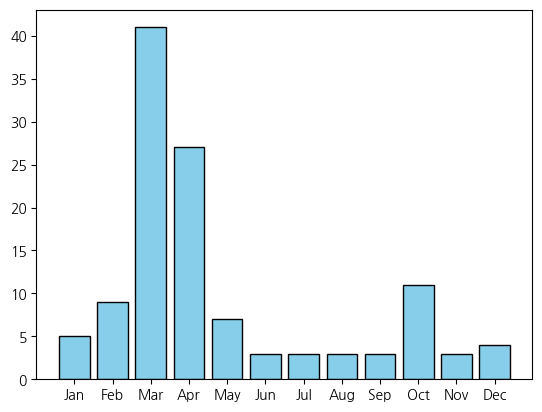

In [48]:
NullDist(WQ_2019)

In [49]:
except_codes_2019 = list(WQ_2019[(WQ_2019['측정값(총대장균군)'].isna()) & (WQ_2020['측정월']!='03')]['조사지점코드'].unique())
print(except_codes_2019)

['1001A15', '1001A20', '1001A75', '1001A85', '1002D30', '1002D40', '1002D60', '1005D10', '1005D20', '1006A63', '1006A75', '1006B10', '1006B20', '1006B30', '1006D10', '1006D15', '1006D20', '1006D25', '1006D30', '1006D35', '1006D40', '1006D45', '1006D50', '1006D55', '1006D60', '1009B20', '1010A35', '1010D10', '1010D20', '1011D10', '1012D10', '1013D10', '1013D30', '1014A70', '1014D10', '1014D30', '1014D40', '1014D50', '1014D60', '1014D70', '1014D80', '1019D10', '1021D10', '1022D05', '1022D10', '1022D20', '1022D25', '1022D30', '1301A10', '1301B10', '1301B20', '1301B30', '1301B40', '1301B50', '1301D10', '1301D20', '1301D30', '1301D40', '1301D50', '1301D60', '1301D70', '1302A50', '1302A60', '1302D05', '1302D10', '1302D20', '1302D25', '1302D30', '1302D35', '1302D40', '1302D45', '1302D50', '1302D55']


In [50]:
WQ_2019 = Interpolate(WQ_2019, except_codes_2019)
WQ_2019.isnull().sum()

조사지점명         0
조사지점코드        0
측정년도          0
측정월           0
측정값(총대장균군)    0
dtype: int64

In [51]:
WQ_2019.describe()

,측정값(총대장균군)
count,1362.000000
mean,6615.361233
std,16188.249766
min,0.000000
25%,130.000000
50%,873.000000
75%,5327.000000
max,167000.000000


In [52]:
WQ_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1362 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   조사지점명       1362 non-null   object 
 1   조사지점코드      1362 non-null   object 
 2   측정년도        1362 non-null   object 
 3   측정월         1362 non-null   object 
 4   측정값(총대장균군)  1362 non-null   float64
dtypes: float64(1), object(4)
memory usage: 63.8+ KB


2018년

In [53]:
# 결측치 수와 비율 계산
mis_count_2018 = WQ_2018.isnull().sum()
mis_ratio_2018 = round(mis_count_2018 / len(WQ_2018) * 100, 2)

# 결측치 수와 비율 출력
mis_info_2018 = pd.concat([mis_count_2018, mis_ratio_2018], axis=1, keys=['결측치 수', '결측치 비율 (%)'])
print(mis_info_2018)

            결측치 수  결측치 비율 (%)
조사지점명           0        0.00
조사지점코드          0        0.00
측정년도            0        0.00
측정월             0        0.00
측정값(총대장균군)    284       17.64


In [54]:
# '조사지점코드'을 기준으로 '측정월'을 바르게 정렬
WQ_2018 = WQ_2018.groupby('조사지점코드').apply(lambda x: x.sort_values('측정월', ascending=True)).reset_index(drop=True)
WQ_2018

,조사지점명,조사지점코드,측정년도,측정월,측정값(총대장균군)
0,송천1,1001A05,2018,01,5700.0
1,송천1,1001A05,2018,03,3120.0
2,송천1,1001A05,2018,04,11500.0
3,송천1,1001A05,2018,05,7640.0
4,송천1,1001A05,2018,06,33200.0
...,...,...,...,...,...
1605,황지2,2001A30,2018,08,12700.0
1606,황지2,2001A30,2018,09,10600.0
1607,황지2,2001A30,2018,10,28400.0
1608,황지2,2001A30,2018,11,4100.0


In [55]:
WQ_2018.describe()

,측정값(총대장균군)
count,1326.000000
mean,9030.554299
std,27761.958450
min,0.000000
25%,237.000000
50%,1295.000000
75%,7275.000000
max,752000.000000


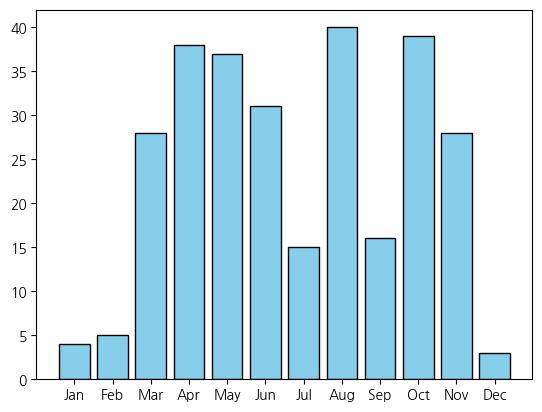

In [56]:
NullDist(WQ_2018)

In [57]:
except_codes_2018 = list(WQ_2018[(WQ_2018['측정값(총대장균군)'].isna()) & (~WQ_2018['측정월'].isin(['03', '05', '08', '10']))]['조사지점코드'].unique())
print(except_codes_2018)

['1001A85', '1002D10', '1002D20', '1002D30', '1002D40', '1002D50', '1002D60', '1005D10', '1005D20', '1006A63', '1006A75', '1006D05', '1006D10', '1006D15', '1006D20', '1006D25', '1006D30', '1006D35', '1006D40', '1006D45', '1006D50', '1006D55', '1006D60', '1010A35', '1010D10', '1010D20', '1011D10', '1012D10', '1013D20', '1014D10', '1014D20', '1014D30', '1014D40', '1014D50', '1014D60', '1014D80', '1021D10', '1022D05', '1022D10', '1022D15', '1022D20', '1022D25', '1022D30', '1301D10', '1301D20', '1301D30', '1301D40', '1301D50', '1301D70', '1302D05', '1302D10', '1302D15', '1302D20', '1302D25', '1302D30', '1302D35', '1302D40', '1302D45', '1302D50', '1302D55', '1303D10']


In [58]:
WQ_2018 = Interpolate(WQ_2018, except_codes_2018)
WQ_2018.isnull().sum()

조사지점명         0
조사지점코드        0
측정년도          0
측정월           0
측정값(총대장균군)    0
dtype: int64

In [59]:
WQ_2018.describe()

,측정값(총대장균군)
count,1327.000000
mean,9024.110776
std,27752.480809
min,0.000000
25%,238.000000
50%,1290.000000
75%,7250.000000
max,752000.000000


In [60]:
WQ_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1327 entries, 0 to 1609
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   조사지점명       1327 non-null   object 
 1   조사지점코드      1327 non-null   object 
 2   측정년도        1327 non-null   object 
 3   측정월         1327 non-null   object 
 4   측정값(총대장균군)  1327 non-null   float64
dtypes: float64(1), object(4)
memory usage: 62.2+ KB


#### 데이터 저장

In [61]:
def Merge(df):
    # 지점코드를 기준으로 시군구 병합
    merged_df = pd.merge(df, code_df[['지점코드', '시군구']], how='left', left_on='조사지점코드', right_on='지점코드').drop(columns='지점코드')
    return merged_df

In [62]:
WQ_2020 = Merge(WQ_2020)
WQ_2019 = Merge(WQ_2019)
WQ_2018 = Merge(WQ_2018)

In [63]:
WQ_2020.to_csv('../data/water_quality_Gangwon_2020.csv', index=False, encoding='utf-8-sig')
WQ_2019.to_csv('../data/water_quality_Gangwon_2019.csv', index=False, encoding='utf-8-sig')
WQ_2018.to_csv('../data/water_quality_Gangwon_2018.csv', index=False, encoding='utf-8-sig')